# 1. Selection sort선택정렬
- 가장 작은 수를 찾은 후 첫번째 인수와 교환한다. 그 다음 첫번째 인수를 제외한 나머지 인수들을 정렬한다.
- *k* iterations(repetition of everything inside the loop) the first *k* elements will be sorted in the right order(this type of a property is called the loop *invaiant(변하지 않는)*)
- 첫번째 인수를 두번째 인수부터 마지막인수까지 차례대로 비교하여 가장 작은 값을 찾아 첫번째에 놓고, 두번째 인수는 세번째~마지막까지 비교하여 그 중 가장 작은 값을 두번째 위치에 놓는 과정을 반복한다.

## 1.1 시간복잡도
1. 비교횟수
    - 두 개의 for loop의 실행
    - 외부 루프 : n-1번
    - 내부 루프(최솟값 찾기) : n-1, n-2, n-3, ..2,1
2. 교환횟수
    - 외부 루프의 실행 횟수와 동일
    - 한 번 교환하기 위해 3번의 이동(swap교환 함수 작업)이 필요하니까 3번
3. 즉 O(n^2)

## 1.2 그림
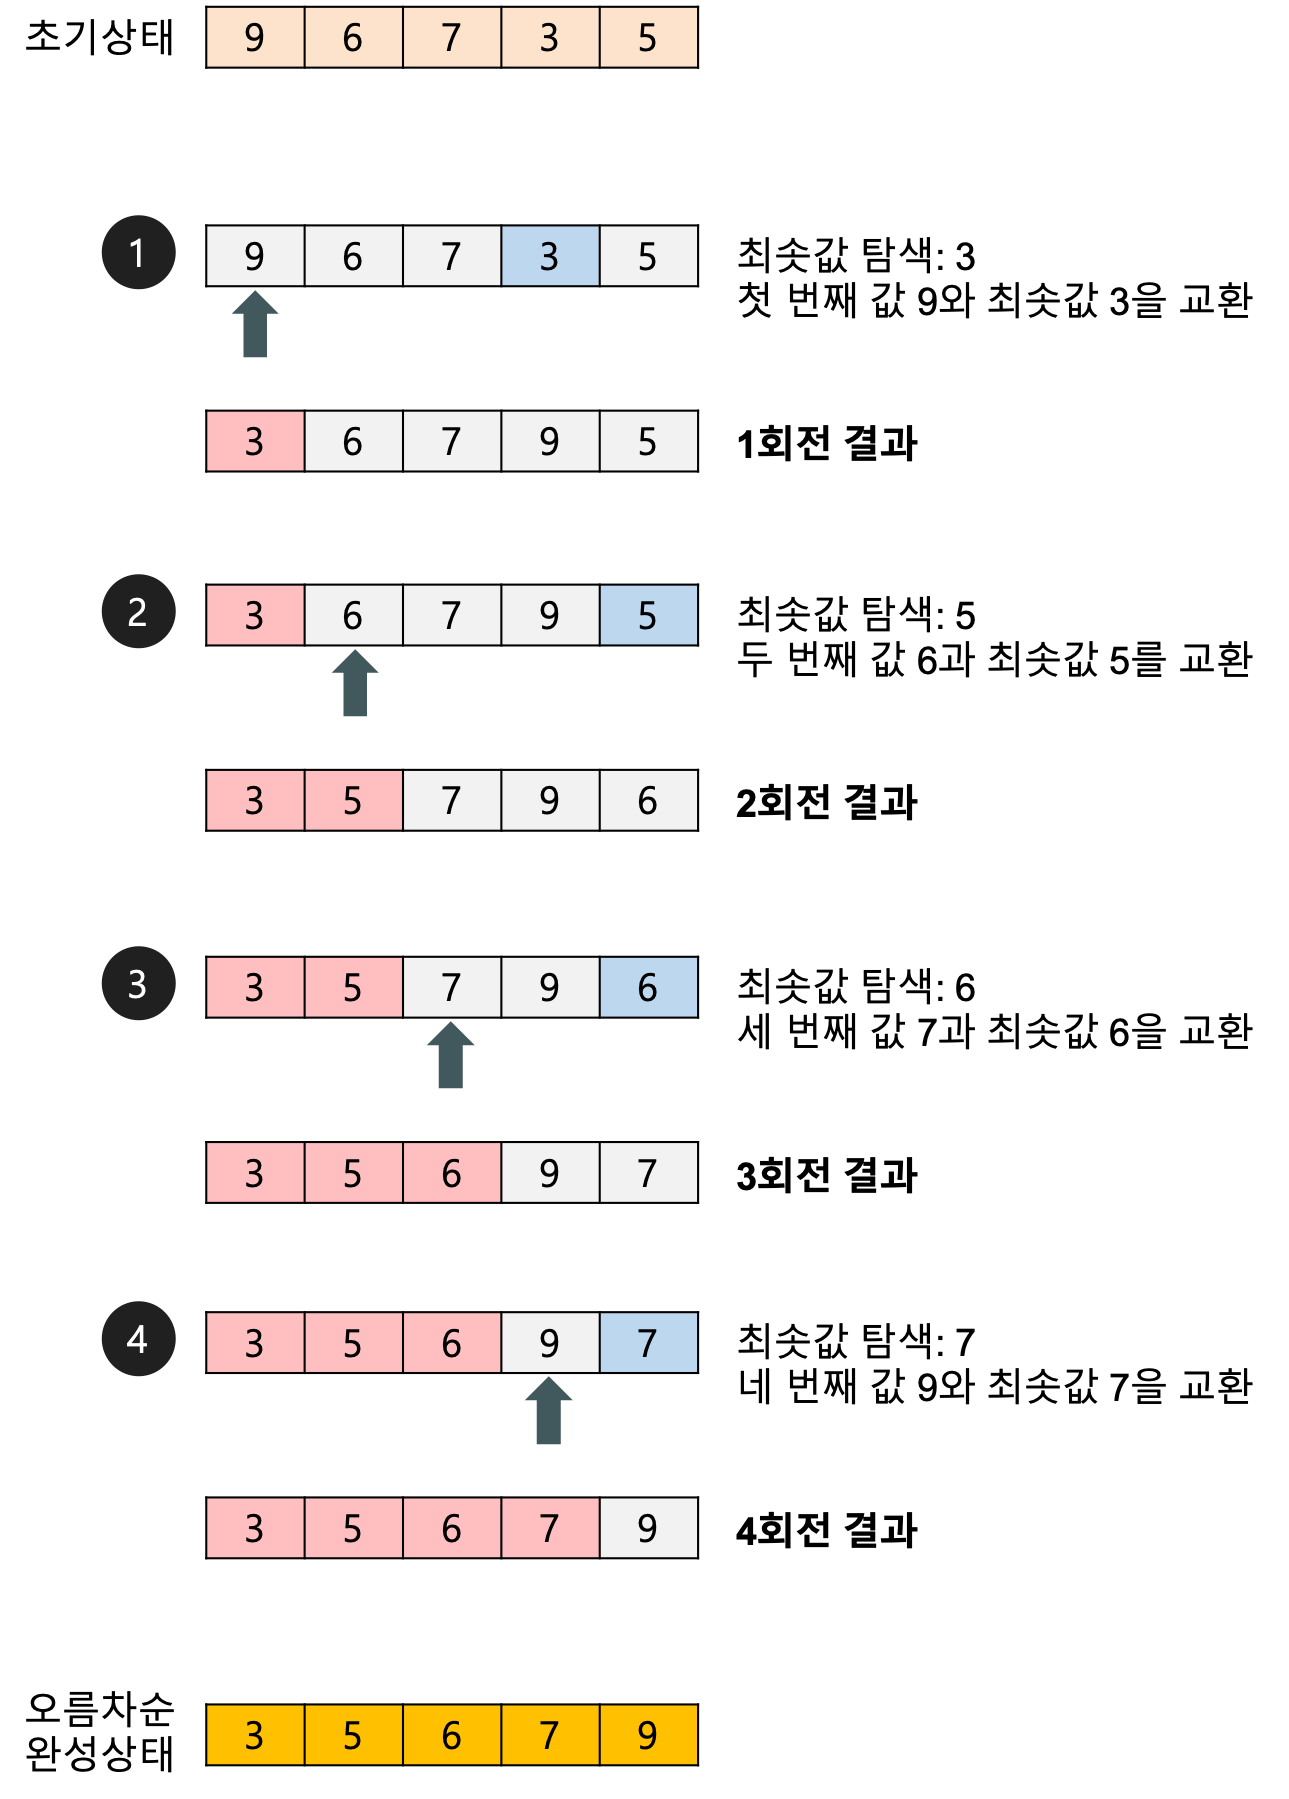

## 1.3 예제 코드

In [11]:
'''
1. A array 개수만큼 돌면서 --- 첫번째 루프
2. 최솟값을 찾아 교환한다.'''
A = [9,6,7,3,5]
n = len(A)

for k in range(len(A)):
#     print(k)
#     print('------')
    min_ = k   
    for j in range(k+1, n):  # 1번 인덱스~4번 인덱스
#         print(j)
        if A[j] < A[min_]:    # 1번 인덱스인 6이 0번 인덱스인 9보다 작으면
            min_ = j          # 0번 인덱스는 1번 인덱스로 바뀐다.
    # swap A[k] and A[min]
    A[k], A[min_] = A[min_], A[k]
    print(A)

[3, 6, 7, 9, 5]
[3, 5, 7, 9, 6]
[3, 5, 6, 9, 7]
[3, 5, 6, 7, 9]
[3, 5, 6, 7, 9]


# 2. Counting sort 
- we have to know the range of the sorted values.
- if all the elements are in the set {0,1,2,...k}, then the array used for counting should be of size *k+1*.
- The limitation here may be available memory.
- 시간복잡도는 O(n+k)

# 3. Merge sort(병합 정렬)
- 배열을 2개로 나눈 다음, 반반씩 정렬해서 합친다. 쪼개진 후에는 각 부분은 다시 나뉜다. 
- 추가적인 리스트가 필요하다.
- 각 부분 배열을 정렬할 때도 합병 정렬을 순환적으로 호출하여 적용한다.
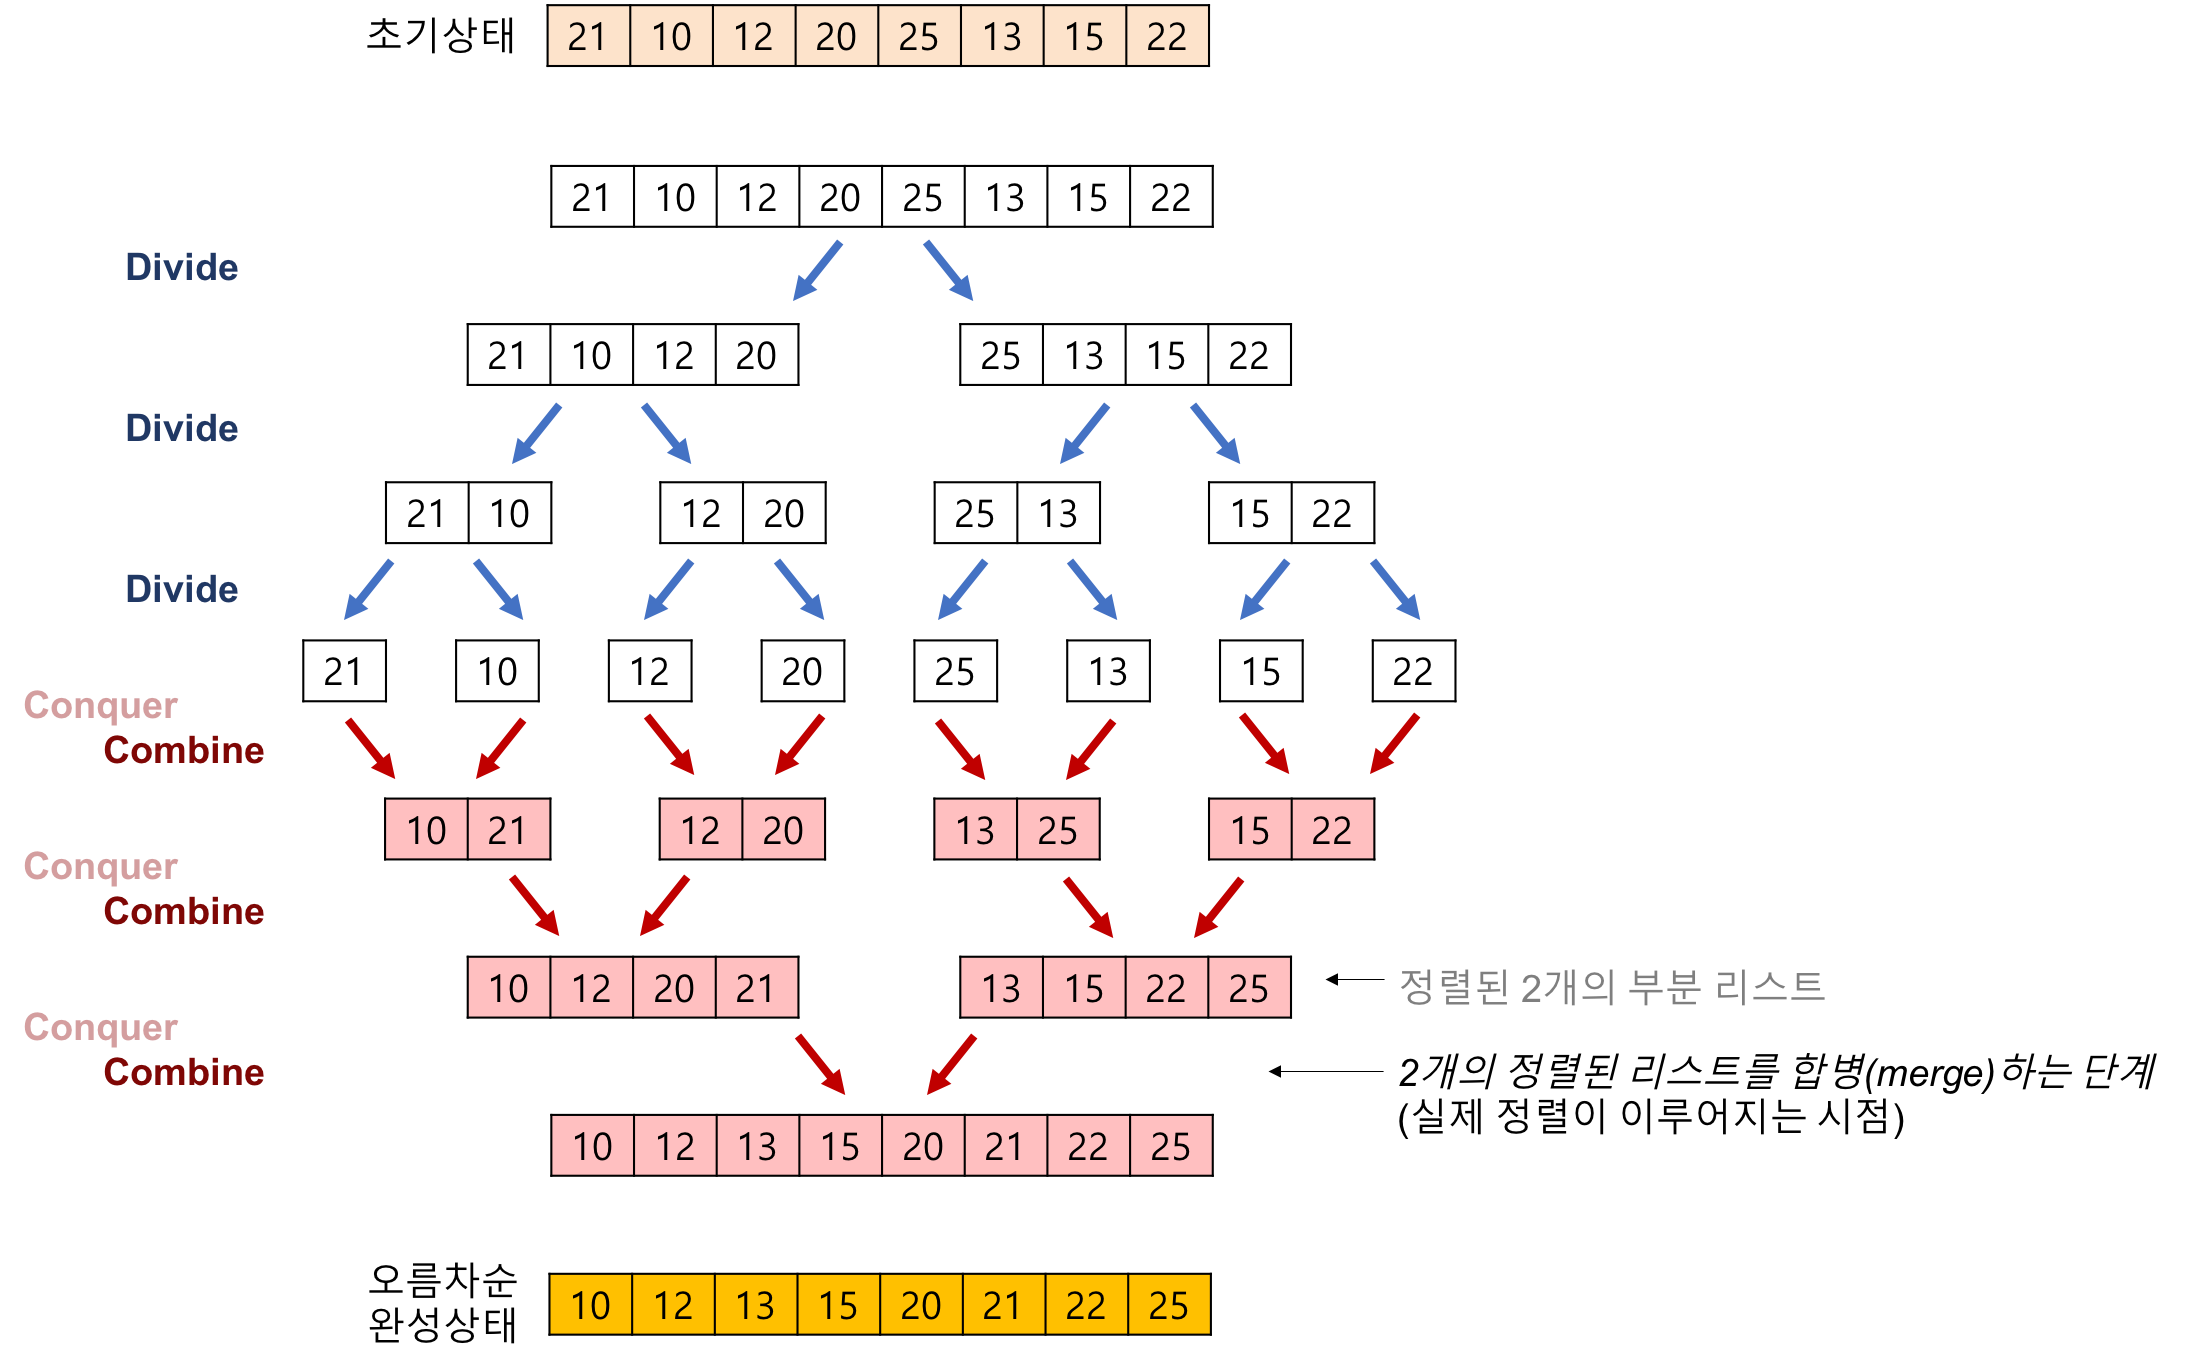
- 실제 정렬이 이뤄지는 시점은 2개의 리스트를 합병하는 단계이다. 

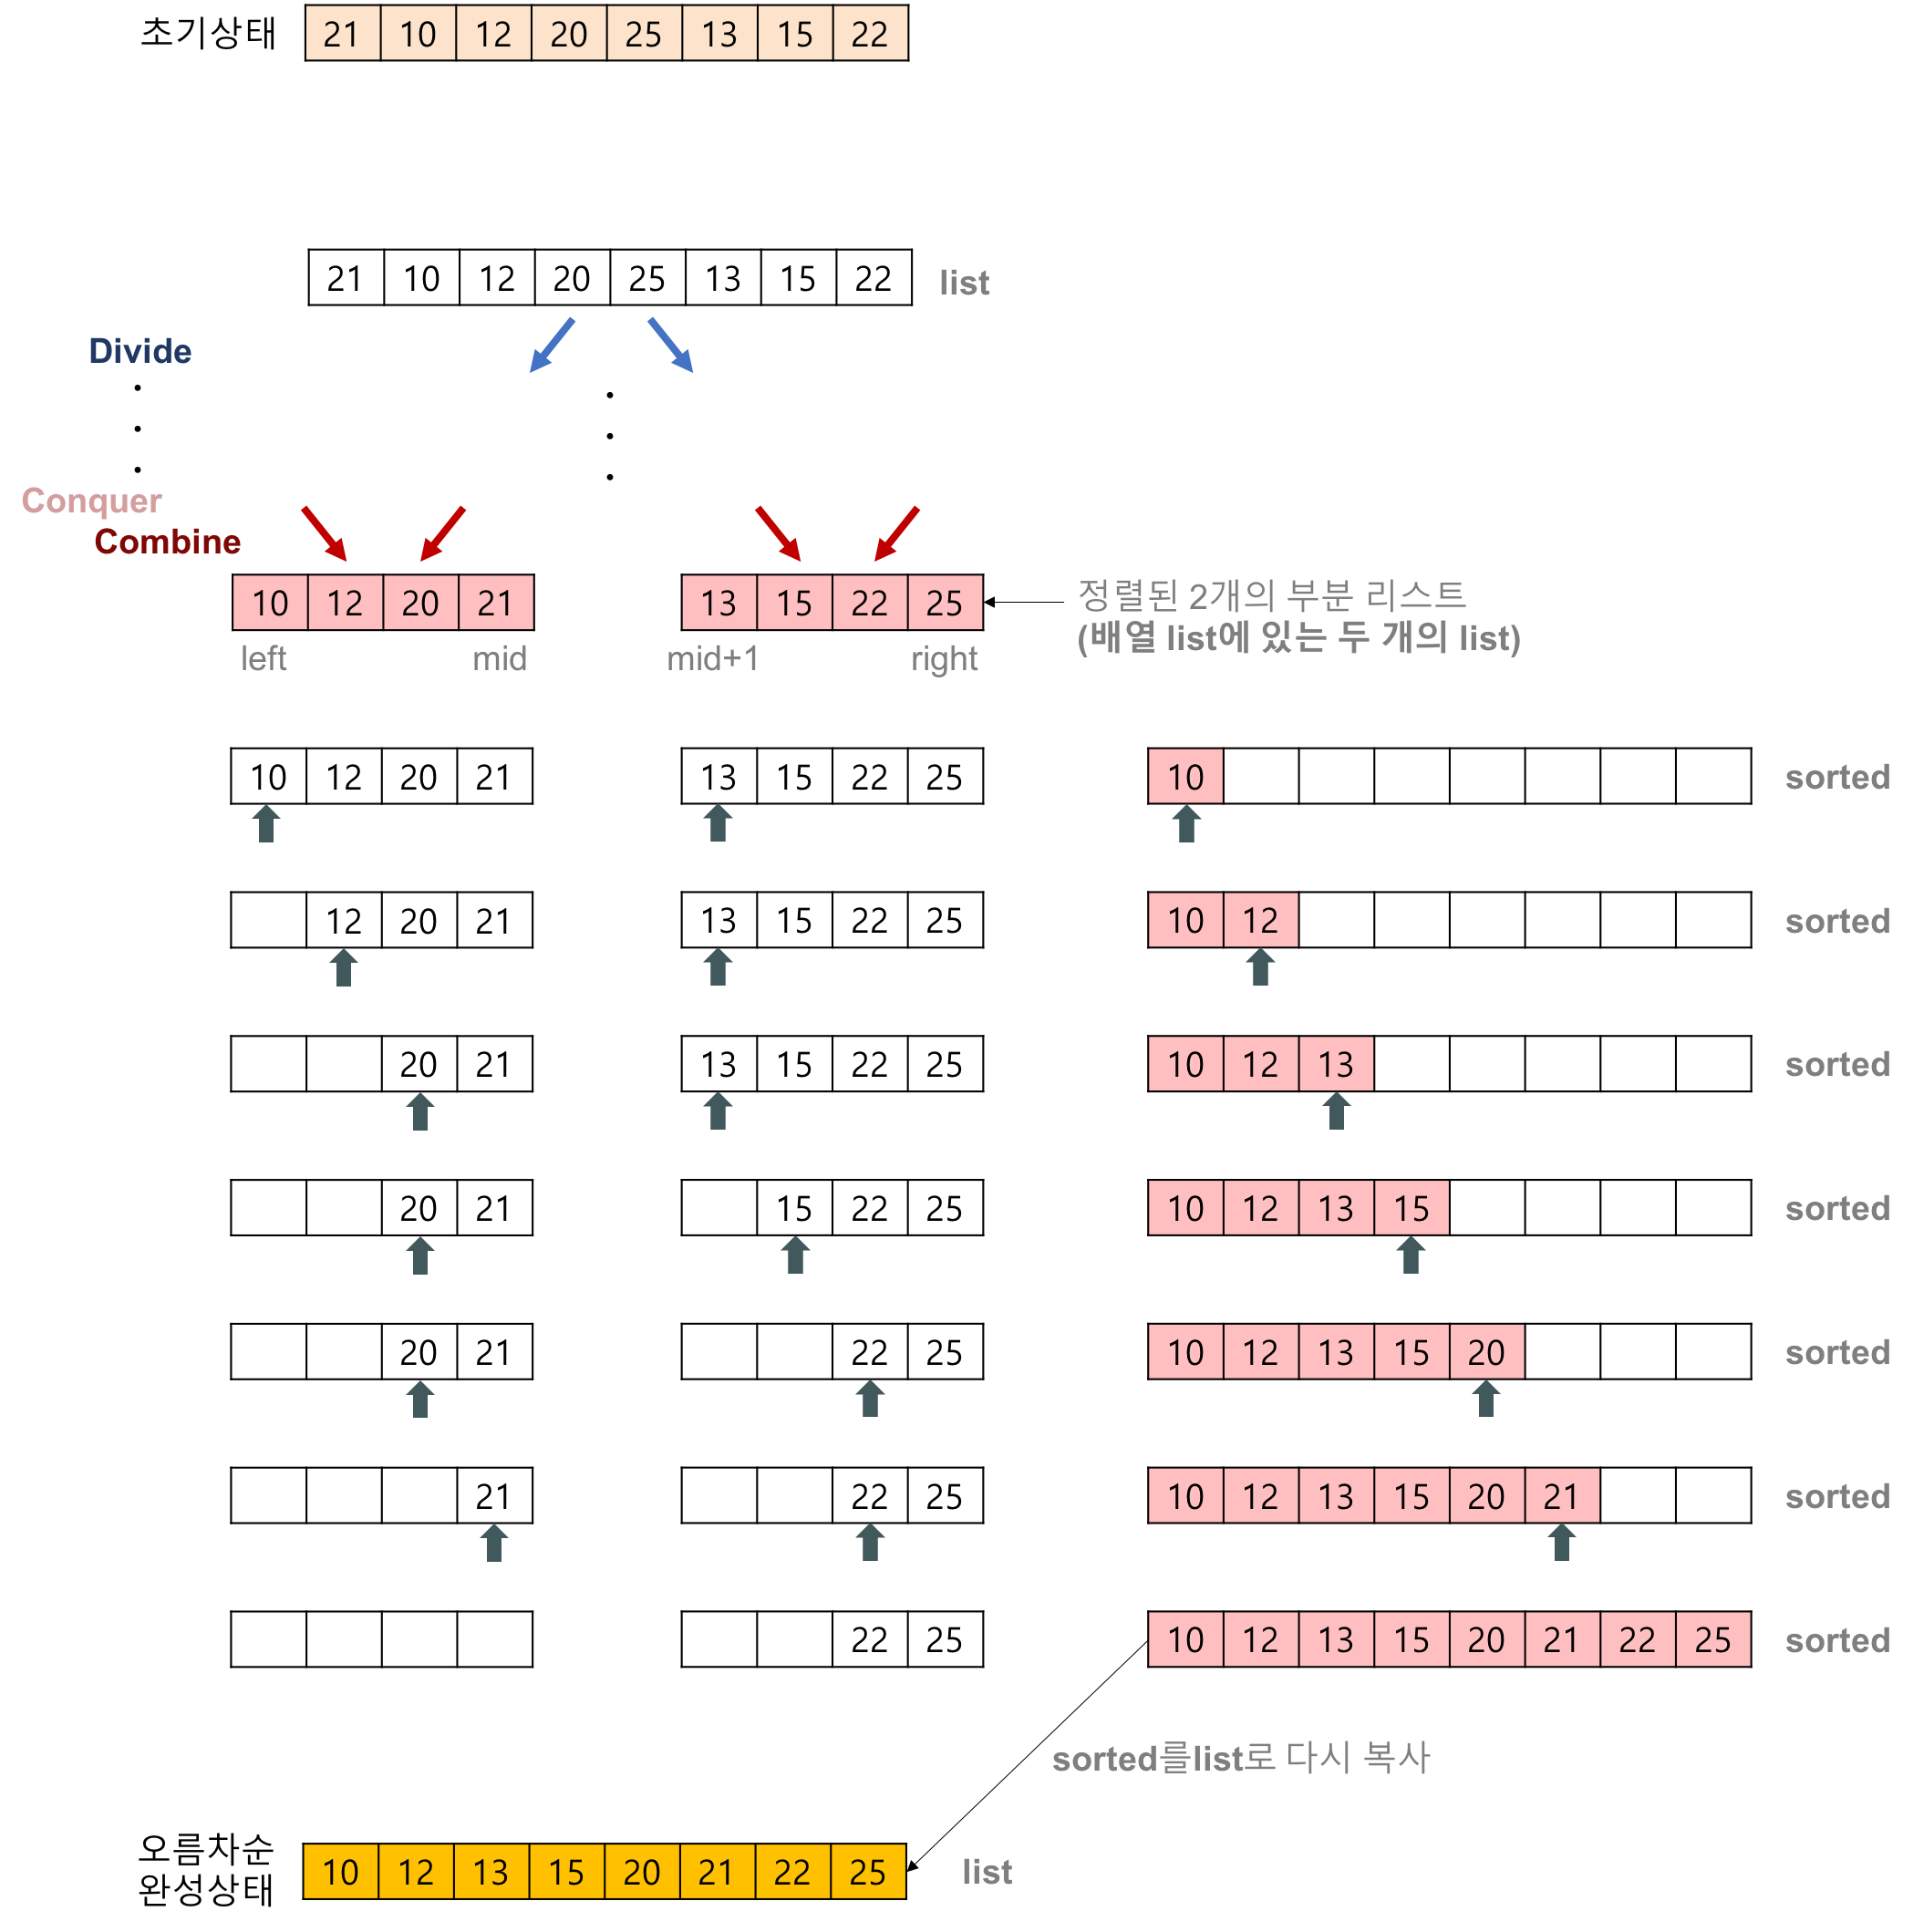

## 3.1 파이썬 구현 과정
1. 중간지점을 중심으로 왼쪽 리스트와 오른쪽 리스트로 쪼갠다.
2. 왼쪽 리스트와 오른쪽리스트에 이 작업(중간 중심 가르기)을 재귀적으로 적용한다.
3. 분리된 리스트를 합치려면...??
    - 왼쪽 리스트와 오른쪽 리스트의 첫번째 요소를 비교해 작은 값을 결과 리스트에 저장해놓고, 
    - 해당 값을 해당 리스트에서 지운다. 이를 왼쪽/오른쪽 요소가 하나도 없어질 때까지 반복
** 즉 병합 정렬 알고리즘은 merge_sort(쪼개기)와 merge(붙이기) 함수를 이용**


In [ ]:
'''
1. input : unsorted list
2. merge_sort : 정중앙의 인덱스를 mid에 저장해서 기준으로 하여 left,right나눔, 
                재귀를 이용해서 나눠진 왼쪽 오른쪽을 다시 반으로 나눈다.
3. merge : 정렬 결과가 담길 새로운 리스트를 만들고,
            왼쪽, 오른쪽 리스트의 각각 0번째 인덱스부터 비교하여 작은 값을 결과리스트에 넣는다.
            왼쪽, 오른쪽 비교가 다 끝난 후 남아 있는 값들을 다 넣어준다
'''

A = [21,10,12,20,25,13,15,22]

def merge_sort(A):
    
    if len(A) <= 1:
        # 데이터가 1개 밖에없으면 정렬할 필요없지
        return A
    
    mid = len(A)//2
    left = A[:mid]
    right = A[mid:]
    
    # 재귀를 이용해서 나눠진 왼쪽, 오른쪽 부분을 다시 반으로 쪼갠다.
    left1 = merge_sort(left)
    right1 = merge_sort(right)
    
    return merge(left1, right1) # 하나의 요소로 다 나눴으면 merge함수에 left, right인자를 넣어 병합한다.


def merge(left, right):
    left_idx = 0
    righ_idx = 0
    result = []  # 결과 리스트
    
    while (left_idx < len(left)) & (righ_idx < len(right)):
        if left[left_idx] < right[righ_idx]:
            result.append(left[left_idx])
            left_idx +=1
        else:
            result.append(right[righ_idx])
            righ_idx +=1
            
    # 남은 값들을 넣어준다.
    while (left_idx < len(left)) :
        result.append(left[left_idx])
        left_idx +=1
        
    while (righ_idx <len(right)):
        result.append(right[righ_idx])
        righ_idx +=1
        
    return result

# 4. sort functions
# 5. Exercise
문제 : a zero-indexed array A(consisting of n > 0)이 있을 때, A배열의 유니크한 값의 개수를 구하라.  
해법 : 첫째로 A를 정렬하되 같은 값이 서로 옆에 붙게끔한다. 둘째로 인접 셀의 구별되는 쌍을 뽑아 개수를 센다.  
시간복잡도 : O(nlogn)

In [ ]:
# the number of distinct values
def distinct(A):
    n = len(A)
    A.sort()
    result = 1   # 왜 1로 주지?? --> 개수를 초기값으로 1로 주는 것.
    
    for k in range(1, n):
        if A[k] != A[k-1]:
            result += 1
    return result

# 문제 풀자

# 문제1. Distinct
Write a function

def solution(A)  

that, given an array A consisting of N integers, returns the number of distinct values in array A.  

For example, given array A consisting of six elements such that:  

 A[0] = 2    A[1] = 1    A[2] = 1  
 A[3] = 2    A[4] = 3    A[5] = 1  
the function should return 3, because there are 3 distinct values appearing in array A, namely 1, 2 and 3.  

Write an efficient algorithm for the following assumptions:  

N is an integer within the range [0..100,000];
each element of array A is an integer within the range [−1,000,000..1,000,000].

In [18]:
A = [2,1,1,2,3,1]

In [27]:
n = len(A)
A.sort()
result = 1   # 왜 1로 주지?? --> 개수를 초기값으로 1로 주는 것.

for k in range(1, n):
    if A[k] != A[k-1]:
        result += 1

In [28]:
result

3

In [29]:
def solution(A):
    unique = set(A)
    return len(unique)

In [30]:
solution(A)

3

score : 100점  
result : https://app.codility.com/demo/results/trainingFH8NZJ-3ZN/

# 문제2. MaxProductOfThree
A non-empty array A consisting of N integers is given. The product of triplet (P, Q, R) equates to A[P] * A[Q] * A[R] (0 ≤ P < Q < R < N).  

For example, array A such that:  

  A[0] = -3  
  A[1] = 1  
  A[2] = 2  
  A[3] = -2  
  A[4] = 5  
  A[5] = 6  
contains the following example triplets:  
  
(0, 1, 2), product is −3 * 1 * 2 = −6  
(1, 2, 4), product is 1 * 2 * 5 = 10  
(2, 4, 5), product is 2 * 5 * 6 = 60  
Your goal is to find the maximal product of any triplet.  

Write a function:

def solution(A)

that, given a non-empty array A, returns the value of the maximal product of any triplet.  
the function should return 60, as the product of triplet (2, 4, 5) is maximal.  
  
Write an efficient algorithm for the following assumptions:  

N is an integer within the range [3..100,000];
each element of array A is an integer within the range [−1,000..1,000].

In [31]:
A = [-3, 1, 2, -2, 5, 6]

In [34]:
A_sorted = sorted(A, reverse = True)
A_sorted

[6, 5, 2, 1, -2, -3]

In [36]:
triplet_num = 3
result = 1
for val in range(0,triplet_num):
    print(val)
    result *= A_sorted[val]
    

0
1
2


In [37]:
result

60

In [38]:
def solution(A):
    A_sorted = sorted(A, reverse = True)
    triplet_num = 3
    result = 1
    for val in range(0,triplet_num):
        result *= A_sorted[val]
    return result

In [39]:
solution(A)

60

score : 44

In [40]:
# 이게 안됐음
B =  [-5, 5, -5, 4]
solution(B)          # (got -100 expected 125). # -5 * -5 * -5

-100

In [70]:
def solution(A):
    A_sorted = sorted(A, reverse = True)
    
    # 경우1. 앞자리 3개가 모두 양수일 경우 그냥 곱하면 된다.
    # [6, 5, 2, 1, -2, -3] 중 6*5*2=60
    Positive_res = A_sorted[0]*A_sorted[1]*A_sorted[2]
    
    # 경우2. 음수나 0이 껴있으면 뒤에 두개를 곱하고 맨앞 곱할 것.(음수일 경우 가장 뒤 2개가 절댓값으론 크니까)
    # [6, 5, 2, 1, -2, -3] 중 -2*-3*6=36
    n = len(A)
    Negative_res = A_sorted[n-1]* A_sorted[n-2] * A_sorted[0]
    
    # 0이 포함되어 있는 경우를 대비해 양수일 때 결과와 음수일 때 결과를 비교해 큰 걸 리턴
    
    if Positive_res > Negative_res:
        return Positive_res
    return Negative_res

In [71]:
solution(A)

60

In [72]:
solution(B)

125

score : 100
result : https://app.codility.com/demo/results/training7NW4U8-B8K/

# 문제3. Triangle
An array A consisting of N integers is given. A triplet (P, Q, R) is triangular if 0 ≤ P < Q < R < N and:  

A[P] + A[Q] > A[R],  
A[Q] + A[R] > A[P],  
A[R] + A[P] > A[Q].  
For example, consider array A such that:  

  A[0] = 10    A[1] = 2    A[2] = 5  
  A[3] = 1     A[4] = 8    A[5] = 20  
Triplet (0, 2, 4) is triangular.  

Write a function:  

def solution(A)  

that, given an array A consisting of N integers, returns 1 if there exists a triangular triplet for this array and returns 0 otherwise.  

For example, given array A such that:  

  A[0] = 10    A[1] = 2    A[2] = 5  
  A[3] = 1     A[4] = 8    A[5] = 20  
the function should return 1, as explained above. Given array A such that:  

  A[0] = 10    A[1] = 50    A[2] = 5  
  A[3] = 1  
the function should return 0.  

Write an efficient algorithm for the following assumptions:  

N is an integer within the range [0..100,000];
each element of array A is an integer within the range [−2,147,483,648..2,147,483,647].

In [110]:
A = [10,2,5,1,8,20]

In [82]:
sorted(A)

[1, 2, 5, 8, 10, 20]

In [88]:
for i in sorted(A):
    print(i, i+1, i+2)
#     print(i + i+1 > i+2)
    
    # 1,2,5 쌍 뺴고는 2,5,8/5,8,10/8,10,20으로는 삼각형을 만들 수 있음
    # 그러니까 트루반환

1 2 3
False
2 3 4
True
5 6 7
True
8 9 10
True
10 11 12
True
20 21 22
True


In [87]:
for i in sorted([10,50,5,1]):
    print(i, i+1, i+2)
#     print(i + i+1 > i+2)


1 2 3
5 6 7
10 11 12
50 51 52


In [100]:
for i in range(len(sorted(A))):
    print(i, sorted(A)[i], sorted(A)[i+1], sorted(A)[i+2])

0 1 2 5
1 2 5 8
2 5 8 10
3 8 10 20


IndexError: list index out of range

In [113]:
def solution(A):
    A_sorted = sorted(A)
    for i in range(len(A_sorted)-2):
#         print(i, A_sorted[i], A_sorted[i+1], A_sorted[i+2])
        if  A_sorted[i]+ A_sorted[i+1] > A_sorted[i+2]:
            return 1
    return 0
        

In [114]:
solution(A)

1

In [115]:
solution(B)

0

score : 100  
result : https://app.codility.com/demo/results/training9CNF83-PYE/